<a href="https://colab.research.google.com/github/Nivedha1524/NLP/blob/main/Ass_4_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Split into Positive & Negative Reviews**

In [2]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()
print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


Positive reviews: 18589
Negative reviews: 18634


**Preprocess Text (Lowercase, remove punctuation, stopwords)**

In [3]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)   # keep only letters
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)
positive_clean = [preprocess(r) for r in positive_reviews]
negative_clean = [preprocess(r) for r in negative_reviews]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Compute TF‑IDF Separately**

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_pos = TfidfVectorizer(max_features=5000)
tfidf_pos = vectorizer_pos.fit_transform(positive_clean)
vectorizer_neg = TfidfVectorizer(max_features=5000)
tfidf_neg = vectorizer_neg.fit_transform(negative_clean)


**Extract Top 15 Terms**

In [5]:
def top_tfidf_terms(tfidf_matrix, vectorizer, n=15):
    mean_scores = tfidf_matrix.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    top_idx = mean_scores.argsort()[-n:][::-1]
    return [(terms[i], mean_scores[i]) for i in top_idx]
top_pos = top_tfidf_terms(tfidf_pos, vectorizer_pos)
top_neg = top_tfidf_terms(tfidf_neg, vectorizer_neg)
print("Top Positive Terms:", top_pos)
print("Top Negative Terms:", top_neg)

Top Positive Terms: [('br', np.float64(0.06292160792826264)), ('movie', np.float64(0.052806344534754475)), ('film', np.float64(0.04917692077252994)), ('one', np.float64(0.032126346431791755)), ('like', np.float64(0.02552156449408508)), ('good', np.float64(0.024902003636802696)), ('great', np.float64(0.023515262202655245)), ('story', np.float64(0.021367641635421746)), ('see', np.float64(0.021072012946182474)), ('really', np.float64(0.020016235347438602)), ('time', np.float64(0.019519518499695368)), ('well', np.float64(0.01927624424519311)), ('would', np.float64(0.018224242199156446)), ('love', np.float64(0.017678356066026045)), ('also', np.float64(0.017460982113348796))]
Top Negative Terms: [('br', np.float64(0.06762384032027743)), ('movie', np.float64(0.060438933237308035)), ('film', np.float64(0.046304439299919425)), ('one', np.float64(0.03196349228070432)), ('like', np.float64(0.02965420745142021)), ('bad', np.float64(0.026159485517910704)), ('good', np.float64(0.024040111815386615))

**Visualize Side‑by‑Side Bar Charts**

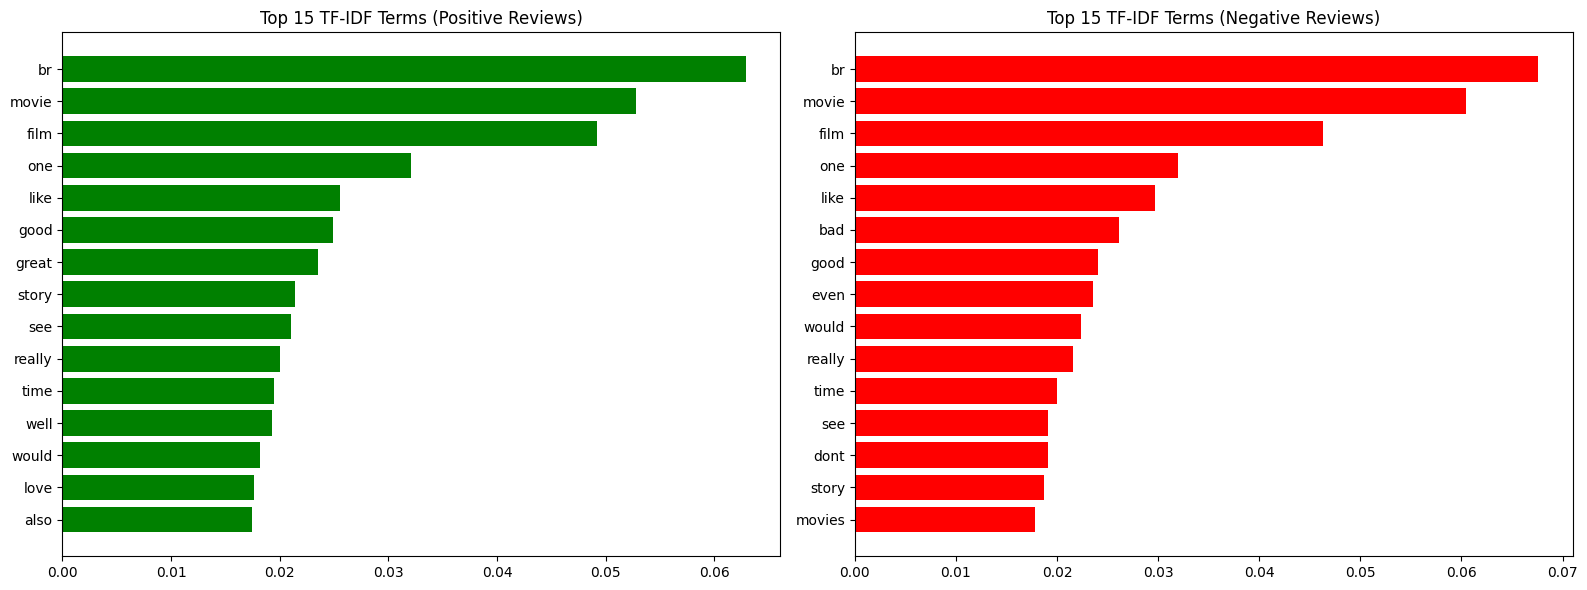

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
pos_df = pd.DataFrame(top_pos, columns=['Term', 'TF-IDF'])
neg_df = pd.DataFrame(top_neg, columns=['Term', 'TF-IDF'])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Positive
axes[0].barh(pos_df['Term'], pos_df['TF-IDF'], color='green')
axes[0].set_title("Top 15 TF-IDF Terms (Positive Reviews)")
axes[0].invert_yaxis()
# Negative
axes[1].barh(neg_df['Term'], neg_df['TF-IDF'], color='red')
axes[1].set_title("Top 15 TF-IDF Terms (Negative Reviews)")
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()